Linear Algebra
Importance of Linear Algebra in Data Science and Machine Learning
 - Manipulation of large datasets

Areas in ML where Linear Algebra is Applied
- Image processing
- Recommender system
- Natural Language Processing

Scalars, Vectors, Matrices, Tensors

In [5]:
# system of linear eaquations for solving analytical problems

# x + y + z = 6 (Total products)
# 2y + 5z = 14 (Resource constraints)
# 2x + 5y - z = 6 (Cost constraints)

import numpy as np

A = np.array([[1,1,1],[0,2,5],[2,5,-1]])
b = np.array([6,14,6])

sol = np.linalg.solve(A,b)
sol

array([2.85714286, 0.57142857, 2.57142857])

In [7]:
# Transpose method
transposed = sol.T
transposed


array([2.85714286, 0.57142857, 2.57142857])

Gradient Descent Basics

current_point(new) = current_point(old) - alpha * f`(x,y)(current_point(old))

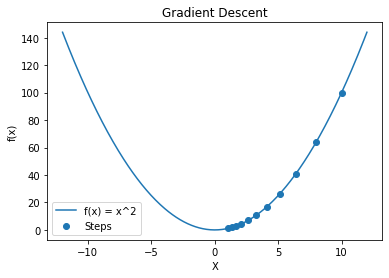

In [12]:
# step_sizes = learning_rate * gradient

import numpy as np
import matplotlib.pyplot as plt

def function(x):
    return x**2

def gradient(x):
    return 2 * x

x = 10
learning_rate = 0.1
steps = [x]

for _ in range(10):
    grad = gradient(x)
    x -= learning_rate * grad
    steps.append(x)


x_values = np.linspace(-12,12,400)
y_values = function(x_values)
plt.plot(x_values, y_values, label='f(x) = x^2')
plt.scatter(steps, function(np.array(steps)), label='Steps')
plt.title('Gradient Descent')
plt.xlabel('X')
plt.ylabel('f(x)')
plt.legend()
plt.show()

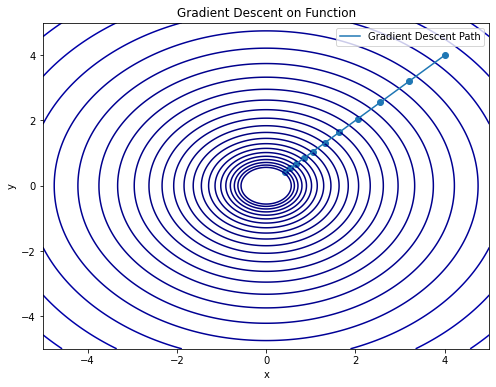

In [20]:
# f(x,y) = x^2 + y^2
# (x,y) = (0,0)

import numpy as np
import matplotlib.pyplot as plt

def function(x,y):
    return x**2 + y**2

def gradient(x,y):
    df_dx = 2 * x
    df_dy = 2 * y

    return np.array([df_dx, df_dy])

learning_rate = 0.1
n_iterations = 10
initial_point = np.array([4.0, 4.0])

points = [initial_point]
current_point = initial_point
for _ in range(n_iterations):
    current_point = current_point - learning_rate * gradient(*current_point)
    points.append(current_point)

points = np.array(points)
x= np.linspace(-5,5,400)
y=np.linspace(-5,5,400)
X, Y=np.meshgrid(x,y)
Z = function(X,Y)
fig, ax = plt.subplots(figsize=(8,6))
CS = ax.contour(X,Y,Z, levels = np.logspace(-0.5,3,35), cmap='jet')
ax.scatter(points[:,0], points[:,1])
ax.plot(points[:,0], points[:,1], label='Gradient Descent Path')
ax.set_title('Gradient Descent on Function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

Model Perfomance Evaluation

In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

iris = load_iris()
X, y = iris.data , iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LogisticRegression(max_iter=200, random_state=42)
model.fit(X_train,y_train)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(train_accuracy)
print(test_accuracy)

scores = cross_val_score(model, X, y)
print( "CV Scores:", scores)

0.9642857142857143
1.0
CV Scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


Ridge and Lasso Regression

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston

X,y = load_boston(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train)
print(lasso.coef_)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
print(ridge.coef_)

[-0.          0.         -0.          0.06146656 -0.          2.99385797
 -0.         -0.         -0.         -0.         -1.23313247  0.3951722
 -3.55963652]
[-1.05413713  0.66437555  0.3128819   0.74118349 -1.89877304  3.14706658
 -0.25666106 -2.91851804  2.1356466  -1.58202618 -2.07557365  1.14929024
 -3.68300256]


ROC and AUC In Model Evaluation